<a href="https://colab.research.google.com/github/t0ccata/final-project-ml/blob/main/Playground_SVM_Denormalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data_rnn = pd.read_csv("https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv")
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
data_rnn.set_index('timestamp', inplace=True)
data_rnn.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [3]:
data_rnn.isna().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [4]:
train_size = int(len(data_rnn) * 0.8)
data_train, data_test = data_rnn[:train_size], data_rnn[train_size:]

In [5]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i + seq_length].values)
        targets.append(data.iloc[i + seq_length, 3])
    return np.array(sequences), np.array(targets)

seq_length = 60
X_train, y_train = create_sequences(data_train, seq_length)
X_test, y_test = create_sequences(data_test, seq_length)

In [6]:
# Split train menjadi train dan validation set
train_val_split = int(len(X_train) * 0.8)
X_train_final, X_val = X_train[:train_val_split], X_train[train_val_split:]
y_train_final, y_val = y_train[:train_val_split], y_train[train_val_split:]

In [7]:
X_train_final = X_train_final.reshape(X_train_final.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
# SVR Model
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train_final, y_train_final)

SVR(C=1000.0, gamma=0.1)

In [9]:
# Predictions
train_predictions = model.predict(X_train_final)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

In [10]:
# Evaluation Metrics
mse_train = mean_squared_error(y_train_final, train_predictions)
mape_train = mean_absolute_percentage_error(y_train_final, train_predictions)
r2_train = r2_score(y_train_final, train_predictions)

print(f'Training Data Metrics:')
print(f'MSE: {mse_train}')
print(f'MAPE: {mape_train}')
print(f'R2 Score: {r2_train}')

Training Data Metrics:
MSE: 69673327.35136184
MAPE: 2.532753609196782
R2 Score: 0.144324820071282


In [11]:
mse_val = mean_squared_error(y_val, val_predictions)
mape_val = mean_absolute_percentage_error(y_val, val_predictions)
r2_val = r2_score(y_val, val_predictions)

print(f'Validation Data Metrics:')
print(f'MSE: {mse_val}')
print(f'MAPE: {mape_val}')
print(f'R2 Score: {r2_val}')

Validation Data Metrics:
MSE: 8673295.238299167
MAPE: 0.11335939526305562
R2 Score: -0.05330496460235801


In [12]:
mse_test = mean_squared_error(y_test, test_predictions)
mape_test = mean_absolute_percentage_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f'Test Data Metrics:')
print(f'MSE: {mse_test}')
print(f'MAPE: {mape_test}')
print(f'R2 Score: {r2_test}')

Test Data Metrics:
MSE: 26216066.157136675
MAPE: 0.5221641367729176
R2 Score: -6.690548162375816


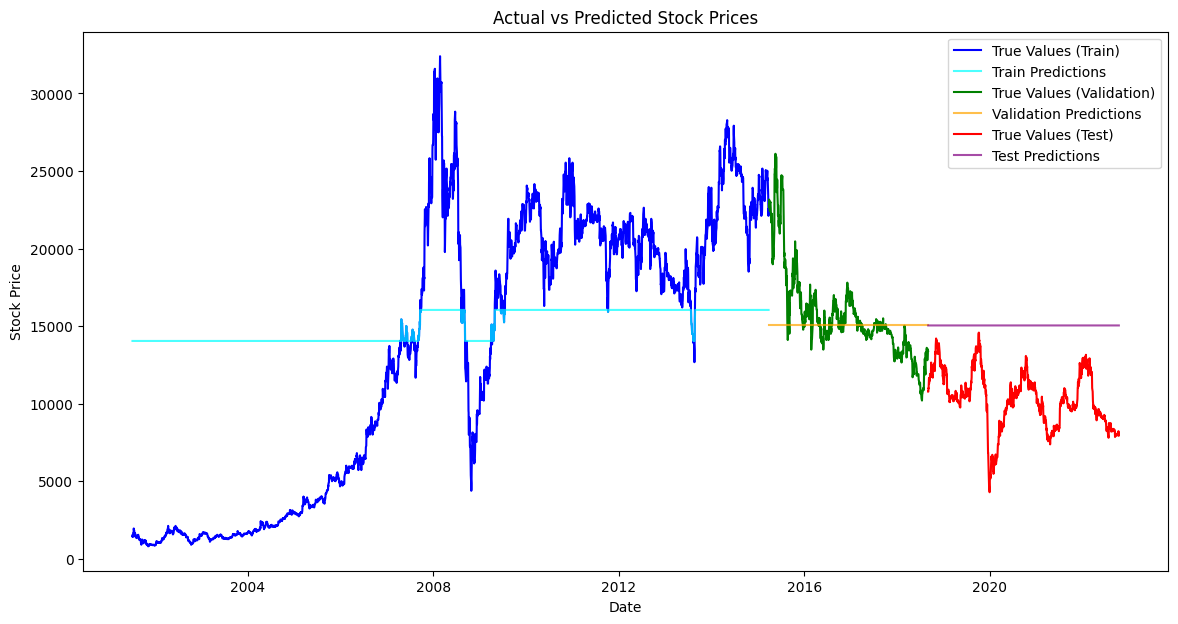

In [16]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data_train.index[seq_length:seq_length + len(y_train_final)], y_train_final, label='True Values (Train)', color='blue')
plt.plot(data_train.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', color='cyan', alpha=0.7)
plt.plot(data_train.index[seq_length + len(y_train_final):seq_length + len(y_train_final) + len(y_val)], y_val, label='True Values (Validation)', color='green')
plt.plot(data_train.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(val_predictions)], val_predictions, label='Validation Predictions', color='orange', alpha=0.7)
plt.plot(data_test.index[:len(y_test)], y_test, label='True Values (Test)', color='red')
plt.plot(data_test.index[:len(test_predictions)], test_predictions, label='Test Predictions', color='purple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()